## Árboles de regresión: dataset Boston

In [1]:
library(MASS)
?Boston

### 1) Divide el dataset en dos mitades aleatorias, una para training y otra para test

In [2]:
## seed
set.seed(1)

## train/test partition
indTrain <- sample(1:nrow(Boston), nrow(Boston)/2) 
indTest = setdiff(1:nrow(Boston), indTrain)
length(indTrain)
length(indTest)

[1] 253

[1] 253

### 2) Nuestra variable objetivo será *medv* (precio de las viviendas). Construye un árbol usando la función *tree*, con los parámetros que vienen por defecto. Represéntalo. ¿Cuántas hojas tiene? ¿Cuántos predictores entran en juego? ¿Cuáles de ellos con los más importantes?


Regression tree:
tree(formula = medv ~ ., data = Boston, subset = indTrain)
Variables actually used in tree construction:
[1] "rm"    "lstat" "crim"  "age"  
Number of terminal nodes:  7 
Residual mean deviance:  10.38 = 2555 / 246 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-10.1800  -1.7770  -0.1775   0.0000   1.9230  16.5800 

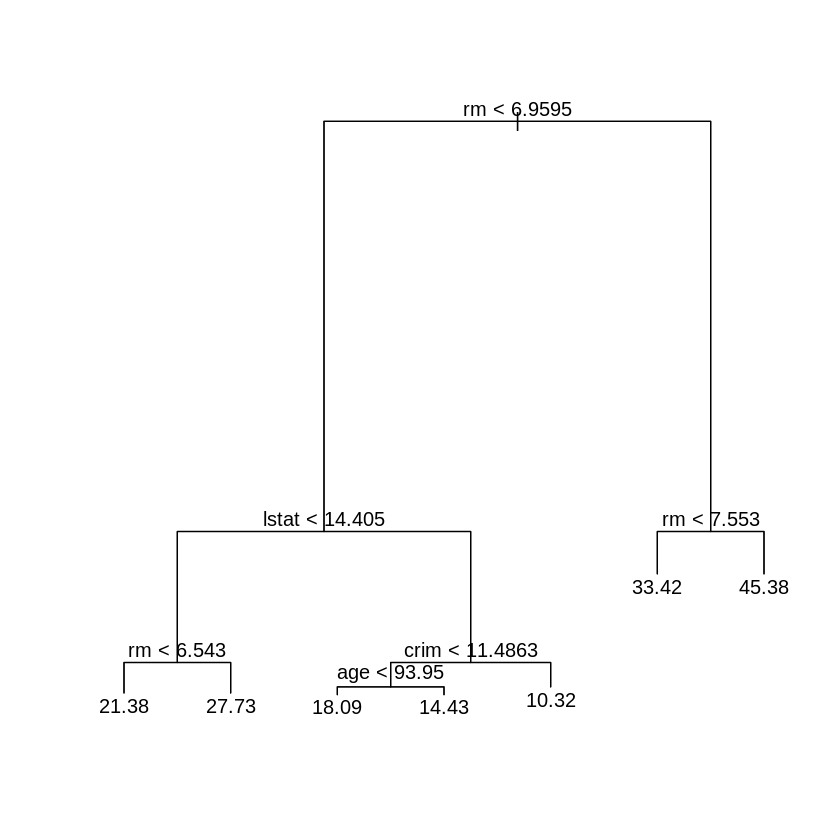

In [3]:
## default tree (by tree) 
library(tree)
t <- tree(medv ~. , Boston, subset = indTrain) 
summary(t)
plot(t); text(t)

### 3) Construye otro árbol más sencillo que sólo utilice los dos predictores con mayor poder explicativo. Represéntalo. ¿Cuántas hojas tiene el árbol? Representa también la partición llevada a cabo en el espacio de predictores en este caso (función *partition.tree*)


Regression tree:
tree(formula = medv ~ rm + lstat, data = Boston, subset = indTrain)
Number of terminal nodes:  6 
Residual mean deviance:  11.77 = 2906 / 247 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-10.180  -2.077  -0.090   0.000   2.151  16.580 

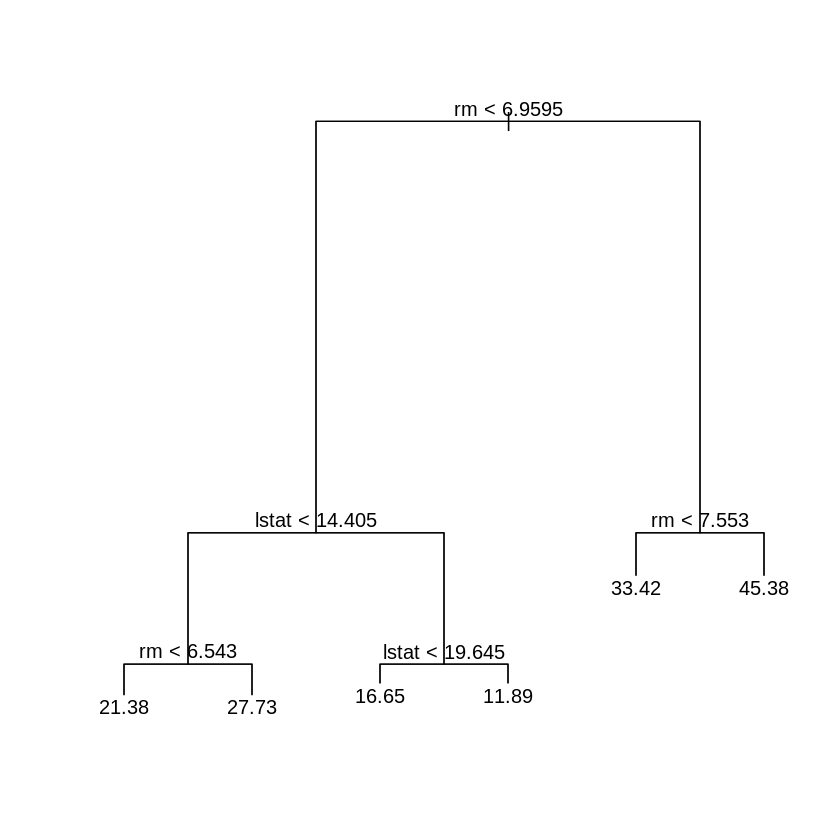

In [4]:
## tree with two predictors - predictor space's partition
t2 = tree(medv ~ rm+lstat, Boston, subset = indTrain) 
summary(t2)
plot(t2); text(t2)

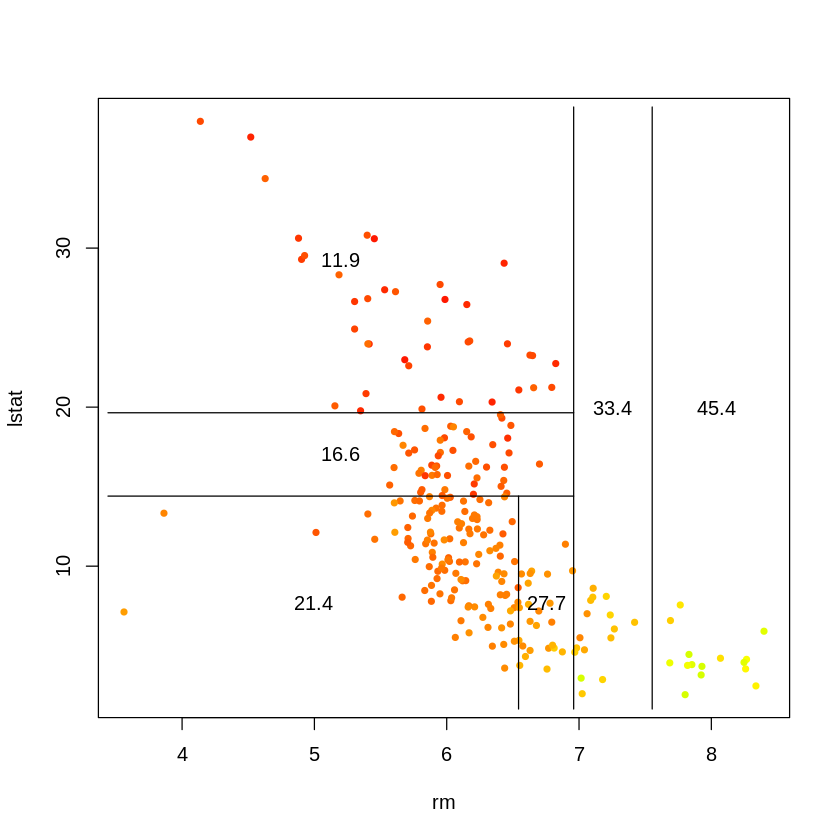

In [5]:
plot(Boston[indTrain, ]$rm, Boston[indTrain, ]$lstat, 
     col = rainbow(length(indTrain))[Boston[indTrain, ]$medv], 
     pch = 20,
     xlab = "rm", ylab = "lstat")
partition.tree(t2, ordvars = c("rm", "lstat"),
               add = T)

### 4) Utilizando los parámetros adecuados en la función *tree*, construye ahora el árbol completo. Represéntalo. ¿Cuántas hojas tiene? ¿Cuántos predictores entran en juego?


Regression tree:
tree(formula = medv ~ ., data = Boston, subset = indTrain, mincut = 1, 
    minsize = 2, mindev = 0)
Variables actually used in tree construction:
 [1] "rm"      "lstat"   "indus"   "dis"     "zn"      "crim"    "nox"    
 [8] "black"   "tax"     "age"     "ptratio" "rad"    
Number of terminal nodes:  227 
Residual mean deviance:  0.002949 = 0.07667 / 26 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.05000  0.00000  0.00000  0.00000  0.00000  0.06667 

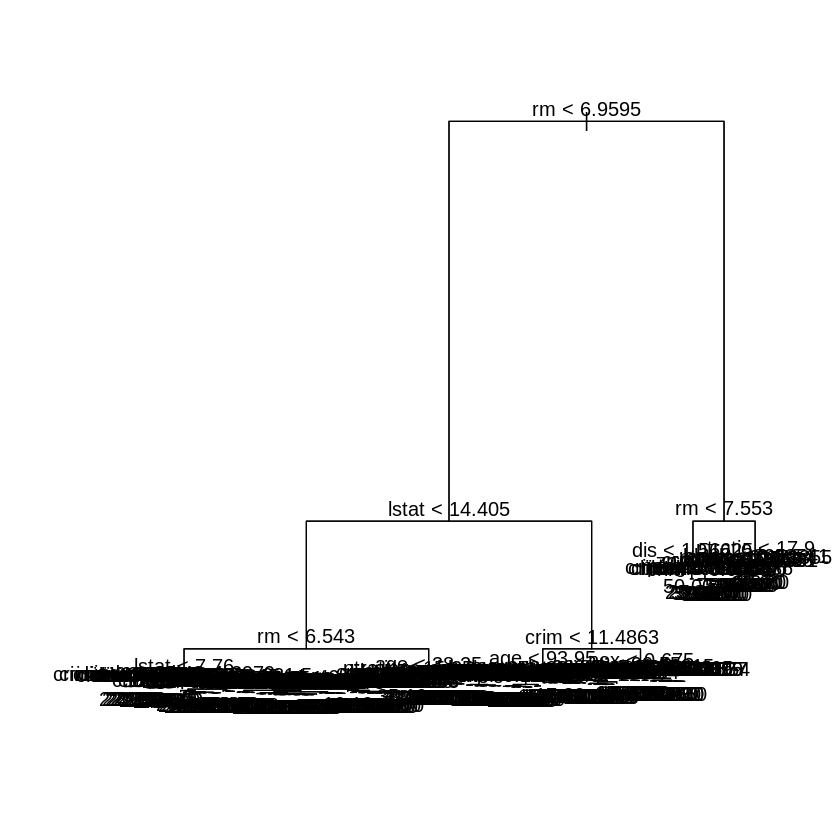

In [6]:
## complete tree (by tree)
t.full <- tree(medv ~. , Boston, subset = indTrain, 
               mincut = 1, minsize = 2, mindev = 0)
                                      
plot(t.full); text(t.full)
summary(t.full)

### 5) Utiliza el árbol por defecto y el completo para predecir el precio de las viviendas tanto en el train como en el test. Valida estas predicciones en función del RMSE. ¿Qué conclusión obtienes?

In [7]:
## default tree (by tree): predict/validate in train and test
# train
t.pred.train <- predict(t, newdata = Boston[indTrain, ])
sqrt(mean((Boston$medv[indTrain] - t.pred.train)^2, na.rm = TRUE))

# test
t.pred.test <- predict(t, newdata = Boston[indTest, ])
sqrt(mean((Boston$medv[indTest] - t.pred.test)^2, na.rm = TRUE))

[1] 3.177645

[1] 5.940276

In [8]:
## complete tree (by tree): predict/validate in train and test
# train
t.full.pred.train <- predict(t.full, newdata = Boston[indTrain, ])
sqrt(mean((Boston$medv[indTrain] - t.full.pred.train)^2, na.rm = TRUE))

# test
t.full.pred.test <- predict(t.full, newdata = Boston[indTest, ])
sqrt(mean((Boston$medv[indTest] - t.full.pred.test)^2, na.rm = TRUE))


[1] 0.01740777

[1] 6.740148

### 6) Echa un vistazo a la variabilidad de las predicciones generadas con el árbol por defecto y con el completo. ¿Qué se observa?

[1] 0.6864071


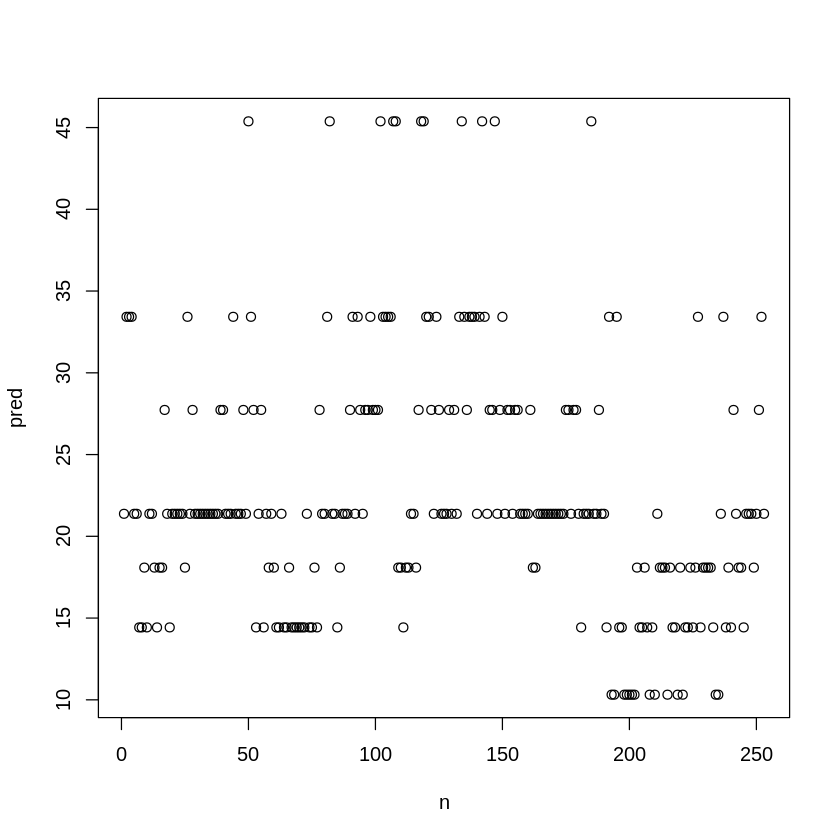

[1] 0.8050476


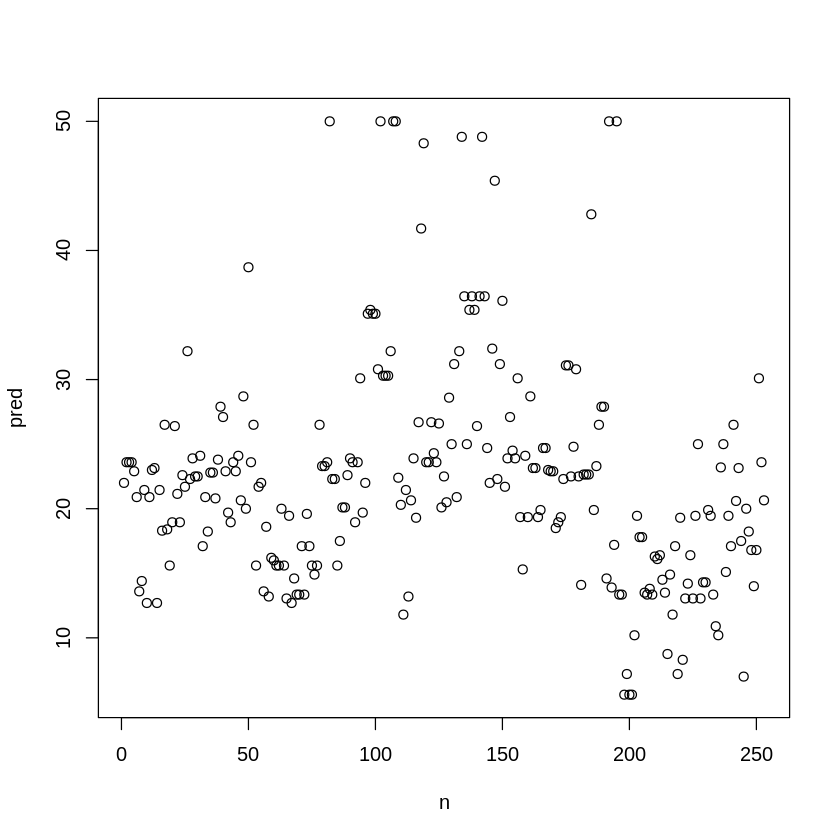

In [9]:
## variability of predictions
plot(t.pred.test, xlab = "n", ylab = "pred")
print(var(t.pred.test) / var(Boston$medv[indTest]))

plot(t.full.pred.test, xlab = "n", ylab = "pred")
print(var(t.full.pred.test) / var(Boston$medv[indTest]))

### 7) Aplica una cross-validación con 5 folds sobre el árbol completo para hallar el número de hojas óptimo. A continuación, construye dicho árbol. ¿A qué valor del parámetro *cost-complexity* corresponde? 

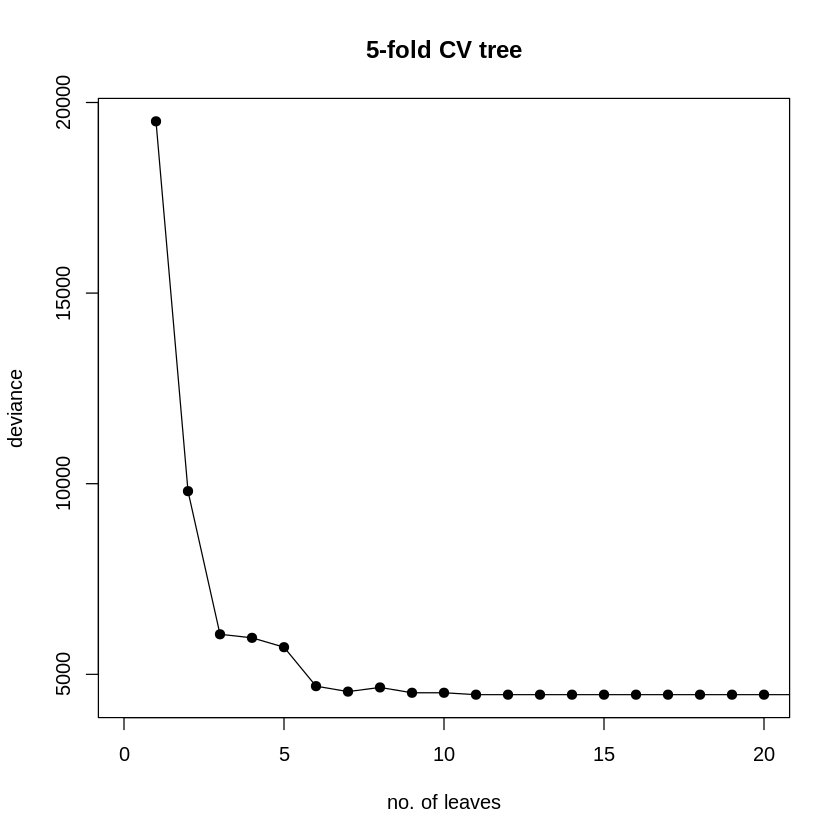

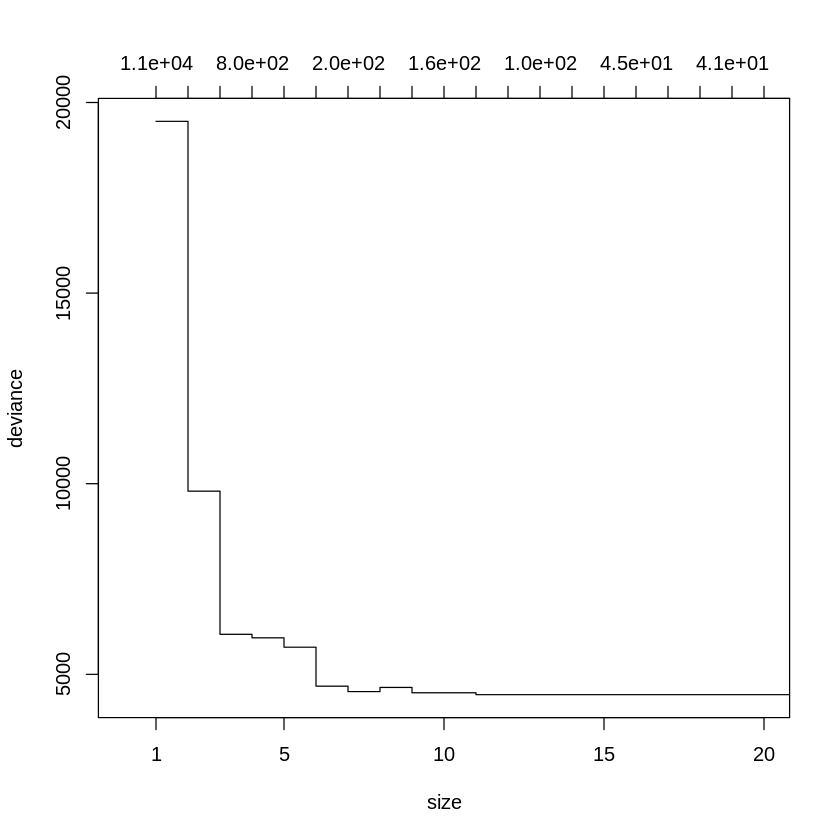

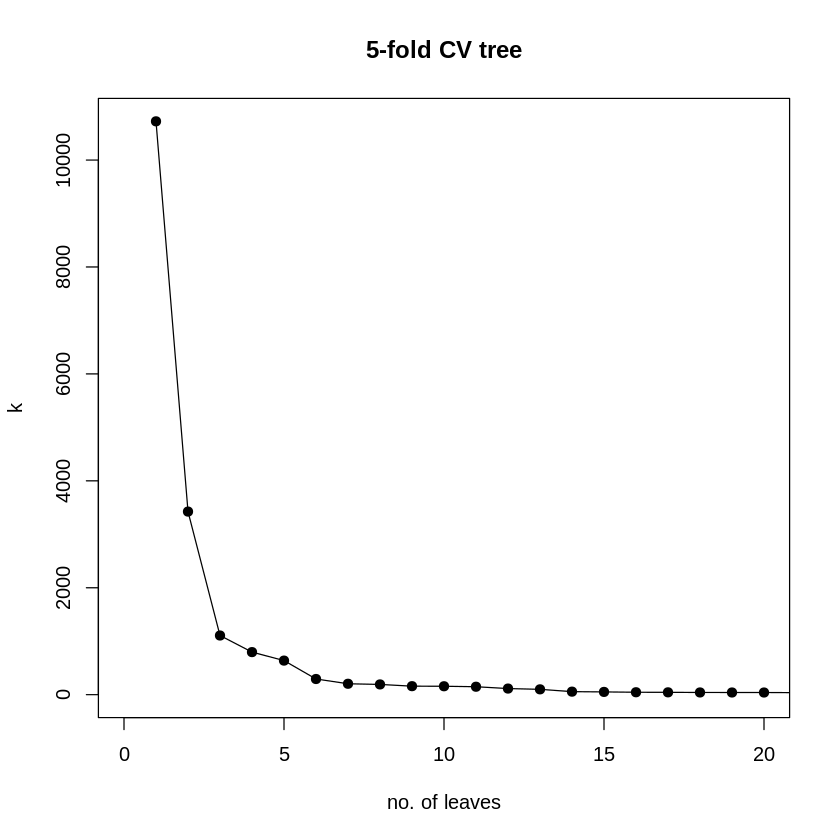

In [10]:
## 5-fold cross-validation of the complete tree
t.full.cv = cv.tree(t.full, K = 5)
plot(t.full.cv$size, t.full.cv$dev, type = "o", pch = 19, lty = 1,
     xlab = "no. of leaves", ylab = "deviance", 
     main = "5-fold CV tree", xlim = c(0, 20))
plot(t.full.cv, xlim = c(0, 20))
plot(t.full.cv$size, t.full.cv$k, type = "o", pch = 19, lty = 1,
     xlab = "no. of leaves", ylab = "k", 
     main = "5-fold CV tree", xlim = c(0, 20))

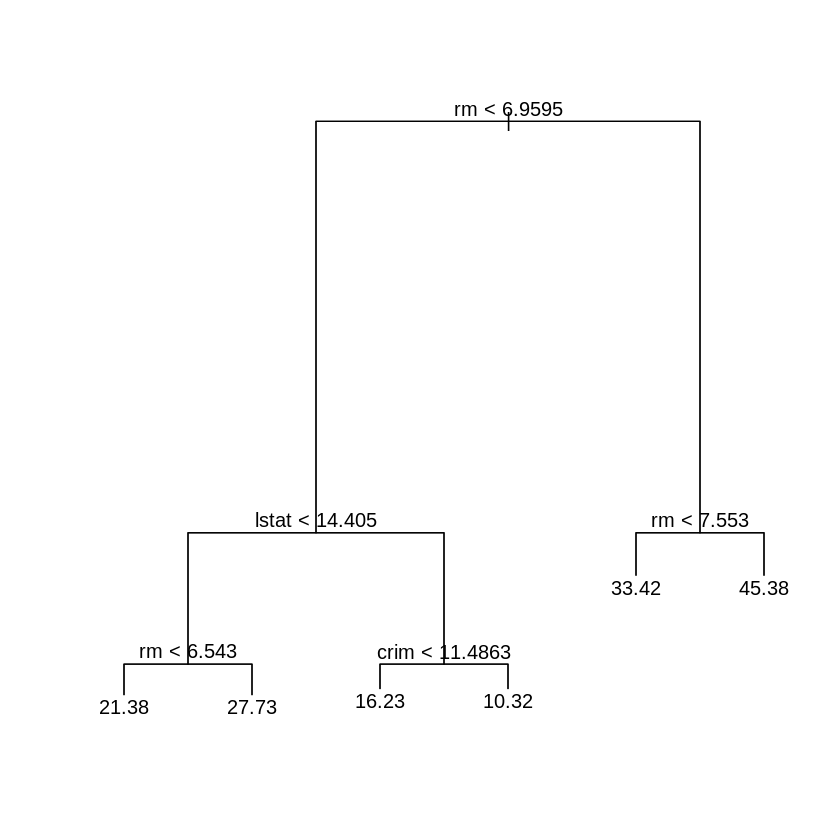

In [11]:
## optimum tree (based on CV)
t.opt = prune.tree(t.full, best = 6)
plot(t.opt);  text(t.opt)

### 8) Utiliza el árbol óptimo para predecir en el test. Valida estas predicciones en función del RMSE y el ratio de varianzas. ¿Qué podrías decir al comparar con los resultados que obtuviste para el árbol por defecto?

In [12]:
## complete tree (by tree): predict/validate in train and test
# test
t.opt.pred.test <- predict(t.opt, newdata = Boston[indTest, ])
sqrt(mean((Boston$medv[indTest] - t.opt.pred.test)^2))
var(t.opt.pred.test) / var(Boston$medv[indTest])

[1] 5.929957

[1] 0.6707987

### 9) Entrena un nuevo árbol utilizando el método *cubist* de *caret* (con los parámetros por defecto) y utílizalo para predecir en el test. Analiza estas predicciones, ¿qué se puede decir con respecto a las mismas?

In [13]:
library(caret)
library(Cubist)

Loading required package: lattice

Loading required package: ggplot2



In [14]:
# Type ?models for details
t.cubist <- train(medv ~. , Boston, subset = indTrain, 
                  method = "cubist")
t.cubist.pred <- predict(t.cubist, newdata = Boston[indTest,])
summary(t.cubist)


Call:
cubist.default(x = x, y = y, committees = param$committees)


Cubist [Release 2.07 GPL Edition]  Fri Dec 17 15:28:58 2021
---------------------------------

    Target attribute `outcome'

Read 253 cases (14 attributes) from undefined.data

Model 1:

  Rule 1/1: [52 cases, mean 13.75, range 5 to 27.5, est err 2.48]

    if
	nox > 0.668
    then
	outcome = -0.44 + 3.71 dis + 19.8 nox - 0.28 lstat + 0.0077 black
	          + 0.071 rad - 0.0034 tax - 0.17 ptratio - 0.037 crim

  Rule 1/2: [132 cases, mean 19.82, range 7 to 30.3, est err 1.99]

    if
	nox <= 0.668
	lstat > 8.1
    then
	outcome = 35.9 + 0.341 rad - 0.0156 tax - 0.31 lstat - 0.66 ptratio
	          - 0.61 dis + 0.0076 black - 0.025 age + 0.9 rm

  Rule 1/3: [71 cases, mean 31.42, range 18.2 to 50, est err 3.39]

    if
	lstat <= 8.1
    then
	outcome = 8.79 - 1.2 lstat + 0.885 rad + 6.9 rm - 0.0185 tax
	          - 0.94 ptratio - 0.08 dis - 0.8 nox

Model 2:

  Rule 2/1: [192 cases, mean 18.48, range 5 to 29.1, est 

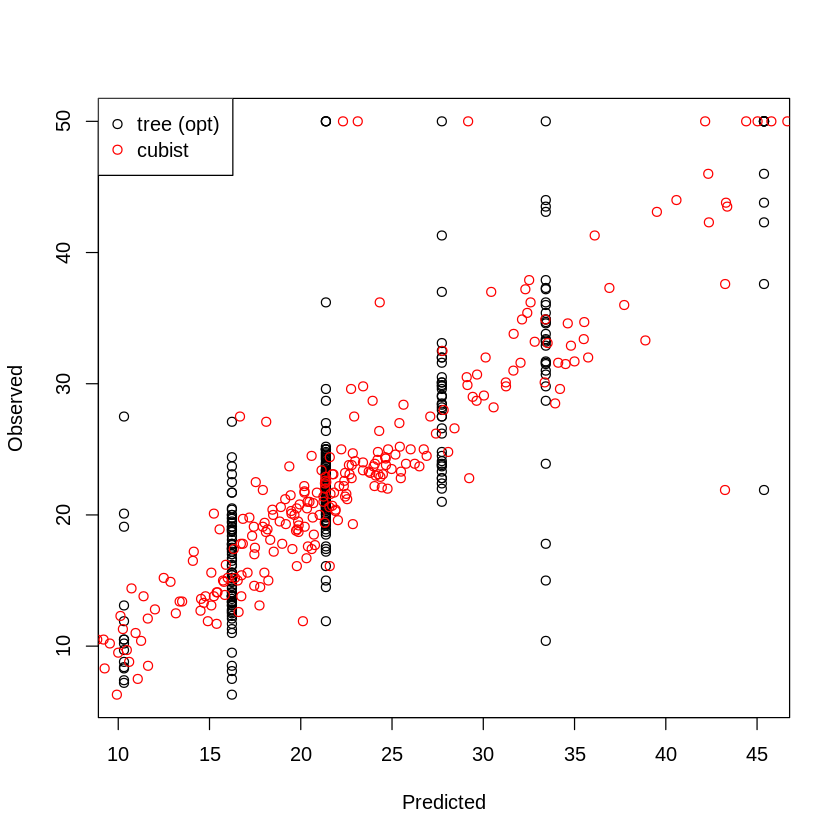

In [15]:
plot(t.opt.pred.test, Boston[indTest, "medv"], ylab = "Observed", xlab = "Predicted")
points(t.cubist.pred, Boston[indTest, "medv"], col = "red")
legend("topleft", c("tree (opt)", "cubist"), pch = 21, col = c(1,2))